In [4]:
import pandas as pd
# Load your CSV file
df = pd.read_csv(r"C:\Users\Mounika\OneDrive\Desktop\bank.csv")
# Remove any extra spaces from column names
df.columns = df.columns.str.strip()
# Print all column names
print("Column names in your dataset:")
for col in df.columns:
    print(f"- {col}")

Column names in your dataset:
- age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"


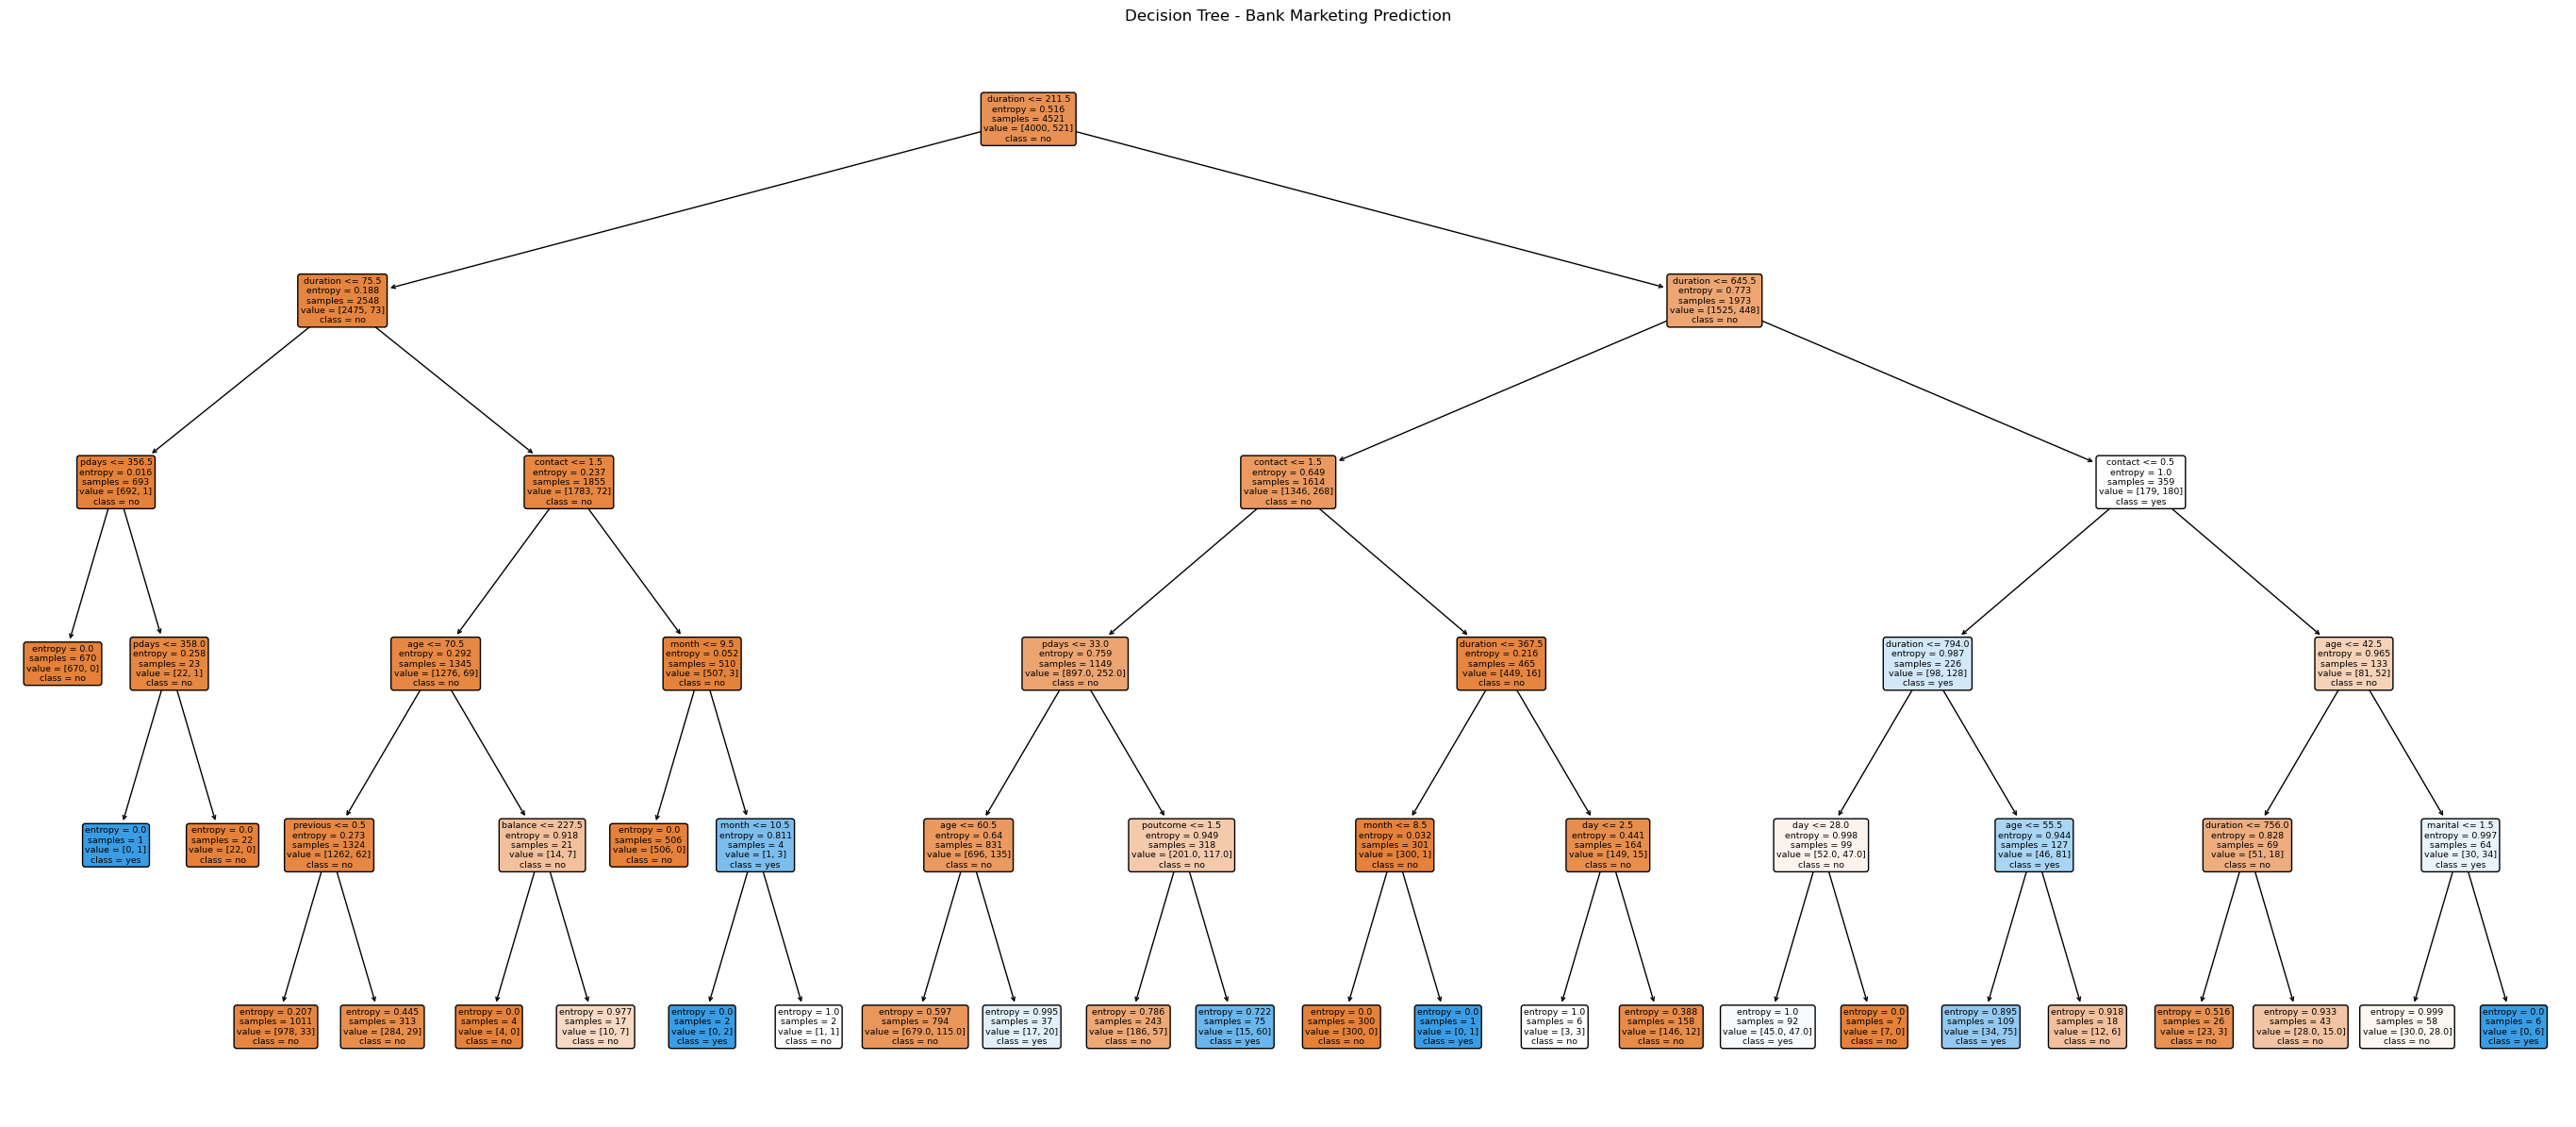

Prediction for sample input: no


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Load the dataset with correct separator
df = pd.read_csv(r"C:\Users\Mounika\OneDrive\Desktop\bank.csv", sep=';')

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Step 4: Features and target
X = df.drop('y', axis=1)
y = df['y']
# Step 5: Train the Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X, y)
# Step 6: Visualize the Decision Tree
plt.figure(figsize=(35, 15))
plot_tree(model,
          feature_names=X.columns,
          class_names=label_encoders['y'].classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree - Bank Marketing Prediction")
plt.show()
# Step 7: Predict a sample
sample = X.iloc[0:1]
pred = model.predict(sample)
print("Prediction for sample input:", label_encoders['y'].inverse_transform(pred)[0])